# Prediction Models 
In this notebook, I undertake feature engineering and data preprocessing, before creating models for prediction of late returns. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1">imports</a></span></li><li><span><a href="#loading-data" data-toc-modified-id="loading-data-2">loading data</a></span><ul class="toc-item"><li><span><a href="#renaming-ID-variables,-for-easier-merging" data-toc-modified-id="renaming-ID-variables,-for-easier-merging-2.1">renaming ID variables, for easier merging</a></span></li></ul></li><li><span><a href="#feature-engineering" data-toc-modified-id="feature-engineering-3">feature engineering</a></span><ul class="toc-item"><li><span><a href="#dropping-variables-irrelevant-to-the-problem" data-toc-modified-id="dropping-variables-irrelevant-to-the-problem-3.1">dropping variables irrelevant to the problem</a></span></li><li><span><a href="#merging-into-single-dataframe" data-toc-modified-id="merging-into-single-dataframe-3.2">merging into single dataframe</a></span></li><li><span><a href="#dropping-missing-value" data-toc-modified-id="dropping-missing-value-3.3">dropping missing value</a></span></li><li><span><a href="#additional-feature:--distance-between-library-and-patron-addresses" data-toc-modified-id="additional-feature:--distance-between-library-and-patron-addresses-3.4">additional feature:  distance between library and patron addresses</a></span></li><li><span><a href="#additional-feature:-patron-age" data-toc-modified-id="additional-feature:-patron-age-3.5">additional feature: patron age</a></span></li><li><span><a href="#comparing-mean-values-across-late-and-timely-returns" data-toc-modified-id="comparing-mean-values-across-late-and-timely-returns-3.6">comparing mean values across late and timely returns</a></span></li><li><span><a href="#examining-categorical-variables" data-toc-modified-id="examining-categorical-variables-3.7">examining categorical variables</a></span><ul class="toc-item"><li><span><a href="#gender" data-toc-modified-id="gender-3.7.1">gender</a></span></li><li><span><a href="#education" data-toc-modified-id="education-3.7.2">education</a></span></li><li><span><a href="#occupation" data-toc-modified-id="occupation-3.7.3">occupation</a></span></li><li><span><a href="#categories" data-toc-modified-id="categories-3.7.4">categories</a></span></li></ul></li></ul></li><li><span><a href="#data-preparation-for-ML-models" data-toc-modified-id="data-preparation-for-ML-models-4">data preparation for ML models</a></span><ul class="toc-item"><li><span><a href="#one-hot-encoding-categorical-variables" data-toc-modified-id="one-hot-encoding-categorical-variables-4.1">one-hot encoding categorical variables</a></span></li><li><span><a href="#separating-features-and-target" data-toc-modified-id="separating-features-and-target-4.2">separating features and target</a></span></li><li><span><a href="#generating-train-test-split" data-toc-modified-id="generating-train-test-split-4.3">generating train-test split</a></span></li></ul></li><li><span><a href="#MODEL-0:-Majority-Class-Predictor" data-toc-modified-id="MODEL-0:-Majority-Class-Predictor-5">MODEL 0: Majority Class Predictor</a></span></li><li><span><a href="#MODEL-1:-Logistic-Regression-Model" data-toc-modified-id="MODEL-1:-Logistic-Regression-Model-6">MODEL 1: Logistic Regression Model</a></span><ul class="toc-item"><li><span><a href="#training" data-toc-modified-id="training-6.1">training</a></span></li><li><span><a href="#evaluation" data-toc-modified-id="evaluation-6.2">evaluation</a></span><ul class="toc-item"><li><span><a href="#accuracy" data-toc-modified-id="accuracy-6.2.1">accuracy</a></span></li><li><span><a href="#classification-report" data-toc-modified-id="classification-report-6.2.2">classification report</a></span></li><li><span><a href="#confusion-matrix" data-toc-modified-id="confusion-matrix-6.2.3">confusion matrix</a></span></li></ul></li></ul></li><li><span><a href="#MODEL-2:-Random-Forest" data-toc-modified-id="MODEL-2:-Random-Forest-7">MODEL 2: Random Forest</a></span><ul class="toc-item"><li><span><a href="#training" data-toc-modified-id="training-7.1">training</a></span></li><li><span><a href="#evaluation" data-toc-modified-id="evaluation-7.2">evaluation</a></span><ul class="toc-item"><li><span><a href="#accuracy" data-toc-modified-id="accuracy-7.2.1">accuracy</a></span></li><li><span><a href="#classification-report" data-toc-modified-id="classification-report-7.2.2">classification report</a></span></li><li><span><a href="#confusion-matrix" data-toc-modified-id="confusion-matrix-7.2.3">confusion matrix</a></span></li></ul></li></ul></li><li><span><a href="#MODEL-3:-Naive-Bayes-Classifier" data-toc-modified-id="MODEL-3:-Naive-Bayes-Classifier-8">MODEL 3: Naive Bayes Classifier</a></span><ul class="toc-item"><li><span><a href="#training" data-toc-modified-id="training-8.1">training</a></span></li><li><span><a href="#evaluation" data-toc-modified-id="evaluation-8.2">evaluation</a></span></li></ul></li><li><span><a href="#MODEL-4:-Gradient-Boosted-Decision-Tree" data-toc-modified-id="MODEL-4:-Gradient-Boosted-Decision-Tree-9">MODEL 4: Gradient-Boosted Decision Tree</a></span><ul class="toc-item"><li><span><a href="#training" data-toc-modified-id="training-9.1">training</a></span></li></ul></li><li><span><a href="#evaluation" data-toc-modified-id="evaluation-10">evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#accuracy" data-toc-modified-id="accuracy-10.0.1">accuracy</a></span></li><li><span><a href="#classification-report" data-toc-modified-id="classification-report-10.0.2">classification report</a></span></li><li><span><a href="#confusion-matrix" data-toc-modified-id="confusion-matrix-10.0.3">confusion matrix</a></span></li></ul></li></ul></li><li><span><a href="#MODEL-5:-RANDOM-FOREST-w/-OPTUNA-HYPERPARAMETER-OPTIMIZATION" data-toc-modified-id="MODEL-5:-RANDOM-FOREST-w/-OPTUNA-HYPERPARAMETER-OPTIMIZATION-11">MODEL 5: RANDOM FOREST w/ OPTUNA HYPERPARAMETER OPTIMIZATION</a></span><ul class="toc-item"><li><span><a href="#training" data-toc-modified-id="training-11.1">training</a></span></li><li><span><a href="#evaluation" data-toc-modified-id="evaluation-11.2">evaluation</a></span><ul class="toc-item"><li><span><a href="#accuracy" data-toc-modified-id="accuracy-11.2.1">accuracy</a></span></li><li><span><a href="#classification-report" data-toc-modified-id="classification-report-11.2.2">classification report</a></span></li><li><span><a href="#confusion-matrix" data-toc-modified-id="confusion-matrix-11.2.3">confusion matrix</a></span></li></ul></li></ul></li><li><span><a href="#MODEL-6:-GBDT-with-HYPERPARAMETER-OPTIMIZATION" data-toc-modified-id="MODEL-6:-GBDT-with-HYPERPARAMETER-OPTIMIZATION-12">MODEL 6: GBDT with HYPERPARAMETER OPTIMIZATION</a></span><ul class="toc-item"><li><span><a href="#training" data-toc-modified-id="training-12.1">training</a></span></li></ul></li><li><span><a href="#evaluation" data-toc-modified-id="evaluation-13">evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#accuracy" data-toc-modified-id="accuracy-13.0.1">accuracy</a></span></li><li><span><a href="#classification-report" data-toc-modified-id="classification-report-13.0.2">classification report</a></span></li><li><span><a href="#confusion-matrix" data-toc-modified-id="confusion-matrix-13.0.3">confusion matrix</a></span></li></ul></li></ul></li><li><span><a href="#MODEL-COMPARISON" data-toc-modified-id="MODEL-COMPARISON-14">MODEL COMPARISON</a></span></li><li><span><a href="#PERFORMANCE-of-BEST-MODEL-on-HOLD-OUT-TEST-SET" data-toc-modified-id="PERFORMANCE-of-BEST-MODEL-on-HOLD-OUT-TEST-SET-15">PERFORMANCE of BEST-MODEL on HOLD-OUT TEST SET</a></span></li></ul></div>

## imports 

In [1]:
import os, sys, glob # for loading, saving and manipulating files on disk
from pathlib import Path # Path allows us to list directory paths in a manner that's not affected by the OS the notebook is being run on 

import pandas as pd # to work with csv files as dataframes 
import numpy as np # for mathematical and scientific computations 

import matplotlib.pyplot as plt # for plots 
import seaborn as sns # also for plotting, it's a wrapper for several matplotlib functions, making them more accessible 

from haversine import haversine, Unit # for computing distances between geocodes

from IPython.core.display import display, HTML # to change width of notebooks
display(HTML("<style>.container { width:100% !important; }</style>"))

## loading data

In [2]:
raw_data_dir = Path.home()/'projects'/'billups_data_challenge'/'Data Challenge' # specifies the directory with data files
cleaned_data_dir = raw_data_dir.parent/'cleaned_data' # directory for storing intermediate outputs such as cleaned data

In [3]:
lib_df = pd.read_csv(cleaned_data_dir/'libraries_cleaned_geocoded.csv')
books_checkouts_df = pd.read_csv(cleaned_data_dir/'books_checkouts_merged.csv')
customers_df = pd.read_csv(cleaned_data_dir/'customers_cleaned_geocoded.csv')

### renaming ID variables, for easier merging

In [4]:
lib_df.rename(columns={'id':'library_id', 'lat':'library_lat', 'long':'library_long', 'name':'library_name'}, inplace=True)
books_checkouts_df.rename(columns={'id':'book_id'}, inplace=True)
customers_df.rename(columns={'id':'patron_id', 'name':'patron_name', 'lat':'patron_lat', 'long':'patron_long'}, inplace=True)

## feature engineering

### dropping variables irrelevant to the problem

Certain variables do not contain information that would be useful for predicting late returns, or that information is already contained in other variables. Here I provide a brief description of such variables: 
- **library name**: the name of the library doesn't matter, it's already identified by the library ID. And it's location is geocoded 
- **customer name**: this variable has high cardinality, and I expect there to be no relation between names and later returns 
- **library address** & **customer address**: both of these are geocoded, so we can work with lat-long directly and don't need full addresses 
- **publisher**&**published date**: my prior is that publisher name doesn't affect late returns except through pages, prices, and categories, both of which are present as independent variables
- **author names** & **title**: again, my prior is that the variables through which authors may affect the late return, already exist in the data 
- **duration_borrowed_days**, **date_returned**, **return_year**: these are not irrelevant variables. They were generated using "date_returned" and therefore contain information that won't be available to the library when a book is being checked out, so using these would result in _data leakage_ in our model. 
- **date_due**: characteristics of this variable have already been extracted in the form of weekday, month, day-of-the-month, so it provides no extra information

In [5]:
lib_df = lib_df[['library_id', 'library_lat', 'library_long']]
books_checkouts_df.drop(columns=['publisher', 'authors', 'title', 'publishedDate', 'date_returned', 'return_year', 'duration_borrowed_days', 'date_due'], inplace=True)
customers_df = customers_df[['patron_id', 'patron_lat', 'patron_long', 'birth_year', 'gender', 'education', 'occupation']]

### merging into single dataframe

In [6]:
df = books_checkouts_df.merge(lib_df, on='library_id', how='outer')
df = df.merge(customers_df, on='patron_id', how='outer')

### dropping missing value
- during cleaning and EDA, I had imputed missing values wherever I could without influencing the target variable 
- I drop the remaining missing values

In [7]:
df = df.dropna(axis=0, how='any')

### additional feature:  distance between library and patron addresses 
 I want to create this feature, as I believe that the further the library is from patron homes, the more likely they might be to return late. 

In [8]:
df['library_loc'] = list(zip(df['library_lat'], df['library_long']))
df['patron_loc'] = list(zip(df['patron_lat'], df['patron_long']))

In [9]:
df['distance_lib_patron_km'] = df.apply(lambda x: haversine(x['library_loc'], x['patron_loc'], unit=Unit.METERS), axis=1)/1000

### additional feature: patron age

In [10]:
df['patron_age'] = 2022 - df['birth_year']
df = df[df['patron_age']<=120]

### comparing mean values across late and timely returns

In [11]:
df.groupby('late_return_indicator').mean()

,price,pages,checkout_year,due_date_is_holiday,closest_holiday_distance,due_date_weekday,due_date_month,due_date_day,due_date_year,library_lat,library_long,patron_lat,patron_long,birth_year,distance_lib_patron_km,patron_age
late_return_indicator,,,,,,,,,,,,,,,,
0.0,293.308421,570.647954,2018.00000,0.022835,13.185538,2.987631,6.706946,15.363463,2018.059943,45.529006,-122.657432,45.537268,-122.655193,1980.424358,4.571822,41.575642
1.0,338.899506,648.092593,1951.04321,0.043210,24389.765432,3.074074,6.574074,14.944444,1951.154321,45.530503,-122.660162,45.528872,-122.653868,1979.271605,7.378124,42.728395


- books with late returns are longer and costlier
- patrons associated with late returns on average live 3km further from the library 
- this table indicates that price, pages and distance are important features for predicting late returns

### examining categorical variables

In [12]:
df.select_dtypes(include='object').nunique()

book_id          197
categories        86
patron_id        949
library_id        18
date_checkout    387
gender             8
education         30
occupation        51
library_loc       18
patron_loc       904
dtype: int64

- there are 7 categorical variables 
- of these 7 variable, 3 are IDs, leaving us with 4 categorical variables: gender, education, occupation, categories
-  the cardinality of each of the 4 categorical columns seems high, so we reduce that 

#### gender

In [13]:
df['gender'].unique()

array(['male', 'female', ' male', ' female', 'MALE', 'FEMALE', 'male ',
       'female '], dtype=object)

In [14]:
df['gender'] = df['gender'].str.strip().str.upper()

In [15]:
df.groupby('gender').mean()

,price,pages,checkout_year,late_return_indicator,due_date_is_holiday,closest_holiday_distance,due_date_weekday,due_date_month,due_date_day,due_date_year,library_lat,library_long,patron_lat,patron_long,birth_year,distance_lib_patron_km,patron_age
gender,,,,,,,,,,,,,,,,,
FEMALE,298.507092,571.346812,2011.136858,0.094868,0.024883,2511.295490,2.867807,6.575428,15.108865,2011.216174,45.531093,-122.658125,45.539314,-122.652988,1980.183515,4.908075,41.816485
MALE,300.401421,591.870175,2006.712281,0.177193,0.026316,4123.222807,3.147368,6.817544,15.531579,2006.764912,45.527077,-122.657426,45.532574,-122.657305,1980.368421,4.990085,41.631579


- Males are 8pp more likely to return books late

#### education

In [16]:
df['education'].fillna('n/a', inplace=True)

In [17]:
df['education']= df['education'].str.strip().str.lower().apply(lambda x: ' '.join(x.split()))

In [18]:
df['education'].unique()

array(['college', 'graduate degree', 'high school', 'others'],
      dtype=object)

In [19]:
df.groupby('education').mean()

,price,pages,checkout_year,late_return_indicator,due_date_is_holiday,closest_holiday_distance,due_date_weekday,due_date_month,due_date_day,due_date_year,library_lat,library_long,patron_lat,patron_long,birth_year,distance_lib_patron_km,patron_age
education,,,,,,,,,,,,,,,,,
college,323.564548,598.645161,2008.538710,0.119355,0.048387,3456.600000,2.961290,6.161290,14.806452,2008.641935,45.535709,-122.668483,45.544499,-122.663432,1980.193548,4.766534,41.806452
graduate degree,287.656203,559.808271,2009.338346,0.112782,0.011278,3168.244361,3.259398,6.270677,14.353383,2009.398496,45.527819,-122.657753,45.531083,-122.657906,1982.466165,4.782645,39.533835
high school,282.820298,583.357143,2011.273810,0.172619,0.017857,2462.479167,2.851190,7.142857,15.407738,2011.327381,45.531208,-122.658197,45.537139,-122.651529,1980.547619,5.079715,41.452381
others,303.387674,578.887043,2006.870432,0.122924,0.023256,4064.146179,2.973422,7.096346,16.554817,2006.920266,45.521500,-122.646381,45.530914,-122.647690,1978.099668,5.128397,43.900332


- patrons with college education most likely to return books late
- followed by patrons with high school education level 
- and then graduate degree holders

#### occupation

In [20]:
df['occupation'].fillna('n/a', inplace=True)

In [21]:
df['occupation'] = df['occupation'].str.strip().str.lower().apply(lambda x: ' '.join(x.split()))

In [22]:
df['occupation'].unique()

array(['admin & support', 'sales', 'business & finance', 'blue collar',
       'others', 'education & health', 'tech'], dtype=object)

In [23]:
df.groupby('occupation').mean()

,price,pages,checkout_year,late_return_indicator,due_date_is_holiday,closest_holiday_distance,due_date_weekday,due_date_month,due_date_day,due_date_year,library_lat,library_long,patron_lat,patron_long,birth_year,distance_lib_patron_km,patron_age
occupation,,,,,,,,,,,,,,,,,
admin & support,314.108962,600.295082,2006.743169,0.131148,0.021858,4109.896175,2.551913,6.109290,15.562842,2006.846995,45.529458,-122.664162,45.532500,-122.659875,1978.573770,4.716067,43.426230
blue collar,292.877862,594.558621,2008.000000,0.110345,0.027586,3652.103448,2.731034,6.813793,17.648276,2008.055172,45.527748,-122.659299,45.542666,-122.657759,1982.193103,4.809364,39.806897
business & finance,279.141688,546.767932,2012.603376,0.130802,0.012658,1978.898734,3.257384,7.620253,15.970464,2012.637131,45.529003,-122.648458,45.551270,-122.649650,1977.088608,5.656734,44.911392
education & health,309.983312,583.375000,2009.000000,0.125000,0.025000,3290.425000,2.850000,6.137500,14.412500,2009.081250,45.530006,-122.648187,45.532281,-122.647344,1980.837500,4.387772,41.162500
others,306.806647,592.676301,2009.601156,0.109827,0.017341,3069.427746,3.358382,6.930636,15.358382,2009.676301,45.529713,-122.658396,45.534302,-122.651692,1979.554913,5.171812,42.445087
sales,298.357170,580.069182,2002.081761,0.138365,0.050314,5809.106918,3.245283,6.062893,14.993711,2002.163522,45.526715,-122.666479,45.520556,-122.658836,1982.880503,4.710491,39.119497
tech,300.957628,583.262821,2013.935897,0.192308,0.032051,1494.923077,2.884615,6.775641,13.006410,2013.980769,45.531732,-122.663460,45.533293,-122.662584,1982.858974,4.829884,39.141026


- patrons working in sales most likely to return books late 

#### categories

In [24]:
df['categories'].unique()

array(["['Social Science']", "['Advertising']",
       "['Business & Economics']", "['Technology & Engineering']",
       "['Mechanics, Applied']", "['Technology']", "['Medical']",
       "['Bacteriology']", "['Medicine']",
       "['Financial services industry']", "['Banks and banking']",
       "['Political Science']", "['Desarrollo economico']",
       "['Internal combustion engines']", "['Science']", "['Philosophy']",
       "['Computers']", "['Water resources development']",
       "['United States']", "['Water-supply']", "['Natural resources']",
       "['Environmental law']", "['Psychology']", "['Mechanics']",
       "['Mechanical engineering']", "['Mechanics, Analytic']",
       "['Electronic books']", "['Government publications']",
       "['Banking law']", "['Financial institutions']", "['Finance']",
       "['Corporations']", "['Diesel engines']", "['Transportation']",
       "['Juvenile Fiction']", "['Conservation of natural resources']",
       "['Agricultural education']"

- the cardinality of the categories variable is really high, so I try to create other categories using this. Primarily, fiction and non-fiction

In [25]:
df['categories'].fillna('n/a', inplace=True)

In [26]:
df['new_category'] = np.where(df['categories'].str.contains('Ficti'), 'Fiction', 'Non-Fiction')

In [27]:
df.drop(columns=['categories'], inplace=True)

In [28]:
df.groupby('new_category').mean()

,price,pages,checkout_year,late_return_indicator,due_date_is_holiday,closest_holiday_distance,due_date_weekday,due_date_month,due_date_day,due_date_year,library_lat,library_long,patron_lat,patron_long,birth_year,distance_lib_patron_km,patron_age
new_category,,,,,,,,,,,,,,,,,
Fiction,283.974583,628.291667,2018.000000,0.041667,0.000000,18.791667,3.583333,6.291667,13.166667,2018.000000,45.530019,-122.654665,45.537878,-122.645333,1982.458333,4.034159,39.541667
Non-Fiction,299.708562,580.036165,2008.877208,0.135408,0.026072,3334.355761,2.987384,6.697225,15.350715,2008.945332,45.529190,-122.657860,45.536112,-122.655212,1980.226241,4.965031,41.773759


- non-fiction books considerably more likely to be returned late than fiction books 

## data preparation for ML models 

### one-hot encoding categorical variables 

In [29]:
ohe_gender = pd.get_dummies(df['gender'])
ohe_education = pd.get_dummies(df['education'], prefix='edu')
ohe_occupation = pd.get_dummies(df['occupation'], prefix='job')
ohe_book_category = pd.get_dummies(df['new_category'])

In [30]:
df = df.join([ohe_gender, ohe_education, ohe_occupation, ohe_book_category])

### separating features and target

In [31]:
y = df['late_return_indicator']
X = df.drop(columns=['book_id', 'patron_id', 'library_id', 'library_loc', 'patron_loc', 
             'gender', 'occupation', 'education', 'new_category', 'late_return_indicator', 'date_checkout', 'birth_year', 'checkout_year', 'due_date_year'])

### generating train-test split 

I want to split my test into three sets: 
- **Train** : these observations will be used to train the model to learn
- **Validation**: this subset serves the purpose of model selection. So, I want to be able to try different hyperparameters, and knowing which hyperparameters are better suited for my model would require me to "test" it on a dataset that is not seen. 
- **Test**: this is a hold-out set, used to indicate the final performance of the "best model" selected using the validation set performance

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=7) #10% of the data is held out 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7) # 1/4th of the training data is used for validation

# Models:

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, roc_auc_score, accuracy_score
from sklearn.feature_selection import RFE 

In [34]:
# variables to store model performances, for easier comparison 
models = {}
overall_accuracy = []
late_return_accuracy = []
auc_score = []

## MODEL 0: Majority Class Predictor
This is our benchmark model. This model simply predicts the majority class in the training sample. It's a very very naive model, but serves as a good baseline for evaluating the performance of our ML models, especially in cases when there is a class imbalance in the training data, which is the case with our data. 

In [35]:
models.update({'m0':'majority_class_predictor'})

In [36]:
y_pred_m0 = [y_train.mode()]*len(y_val) # simply predicts the majority-class in the training sample

In [37]:
print(classification_report(y_val, y_pred_m0))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       236
         1.0       0.00      0.00      0.00        37

    accuracy                           0.86       273
   macro avg       0.43      0.50      0.46       273
weighted avg       0.75      0.86      0.80       273



/Users/garima/miniconda3/envs/reloc/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/garima/miniconda3/envs/reloc/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/garima/miniconda3/envs/reloc/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

- this model is able to achieve an overall accuracy of 86% even with a constant prediction. This is because the majority class in our training data is also the predominant majority class in the validation set. 
- the absolute minimum accuracy we should be able to achieve with more complex models is 86%
- however, the library doesn't necessarily care about "overall accuracy" but ability to predict defaults, i.e the recall value for the "1" class, which in this case is zero.

<AxesSubplot:>

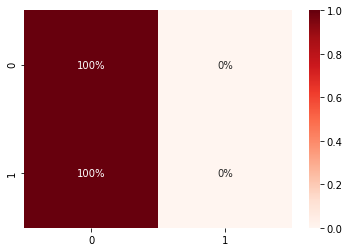

In [38]:
cm_m0= confusion_matrix(y_val, y_pred_m0, normalize='true')
sns.heatmap(cm_m0, annot=True, fmt='.0%', cmap='Reds')

In [39]:
overall_accuracy.append(accuracy_score(y_val, y_pred_m0))
late_return_accuracy.append(recall_score(y_val, y_pred_m0))
auc_score.append(roc_auc_score(y_val, y_pred_m0))

## MODEL 1: Logistic Regression Model 

In [40]:
from sklearn.linear_model import LogisticRegression
models.update({'m1':'logit_reg'})

### training 

In [41]:
m1_lr = LogisticRegression()
m1_lr.fit(X_train, y_train);

/Users/garima/miniconda3/envs/reloc/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### evaluation

In [42]:
y_pred_m1 = m1_lr.predict(X_val) 

#### accuracy

In [43]:
print(f"Accuracy of the LogisticRegression model is {round(m1_lr.score(X_val, y_val), 3)*100}%")

Accuracy of the LogisticRegression model is 89.0%


#### classification report

In [44]:
print(classification_report(y_val, y_pred_m1))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       236
         1.0       0.73      0.30      0.42        37

    accuracy                           0.89       273
   macro avg       0.82      0.64      0.68       273
weighted avg       0.88      0.89      0.87       273



#### confusion matrix 

<AxesSubplot:>

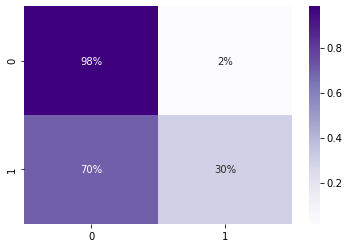

In [45]:
cm= confusion_matrix(y_val, y_pred_m1, normalize='true')
sns.heatmap(cm, annot=True, fmt='.0%', cmap='Purples')

In [46]:
overall_accuracy.append(accuracy_score(y_val, y_pred_m1))
late_return_accuracy.append(recall_score(y_val, y_pred_m1))
auc_score.append(roc_auc_score(y_val, y_pred_m1))

## MODEL 2: Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
models.update({'m2':'random_forest'})

### training

In [48]:
def get_best_max_depth(): 
    max_depth_accuracy = []
    for i in range(1,25): 
        model = RandomForestClassifier(max_depth=i, random_state=7)
        model.fit(X_train, y_train)
        max_depth_accuracy.append(model.score(X_val, y_val))
    max_accuracy = max(max_depth_accuracy)
    best_max_depth = max_depth_accuracy.index(max_accuracy)
    return best_max_depth

In [49]:
m2_rf= RandomForestClassifier(max_depth=get_best_max_depth(), random_state=7)
m2_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=7)


### evaluation

In [50]:
y_pred_m2 = m2_rf.predict(X_val)

#### accuracy

In [51]:
print(f"Accuracy of the Random Forest model is {round(m2_rf.score(X_val, y_val), 4)*100}%")

Accuracy of the Random Forest model is 94.51%


#### classification report

In [52]:
print(classification_report(y_val, y_pred_m2))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       236
         1.0       1.00      0.59      0.75        37

    accuracy                           0.95       273
   macro avg       0.97      0.80      0.86       273
weighted avg       0.95      0.95      0.94       273



#### confusion matrix 

<AxesSubplot:>

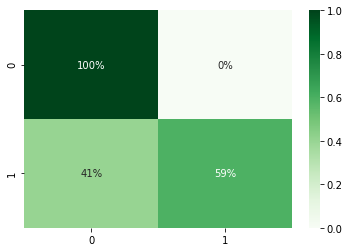

In [53]:
cm_m2 = confusion_matrix(y_val, y_pred_m2, normalize='true')
sns.heatmap(cm_m2, annot=True, fmt='.0%', cmap='Greens')

<AxesSubplot:title={'center':'Top 10 Features'}>

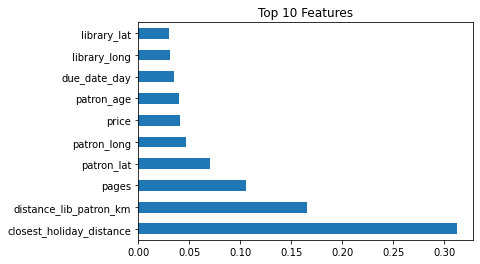

In [54]:
fi_df= pd.Series(m2_rf.feature_importances_, index=X.columns)
fi_df.sort_values(ascending=False, inplace=True)
fi_df.head(10).plot(kind='barh', title='Top 10 Features')

In [55]:
overall_accuracy.append(accuracy_score(y_val, y_pred_m2))
late_return_accuracy.append(recall_score(y_val, y_pred_m2))
auc_score.append(roc_auc_score(y_val, y_pred_m2))

## MODEL 3: Naive Bayes Classifier

In [56]:
from sklearn.naive_bayes import GaussianNB
models.update({'m3':'naive_bayes'})

### training 

In [57]:
m3_nb = GaussianNB()
m3_nb.fit(X_train, y_train)

GaussianNB()

### evaluation

In [58]:
y_pred_m3 = m3_nb.predict(X_val)

In [59]:
print(classification_report(y_val, y_pred_m3))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       236
         1.0       1.00      0.16      0.28        37

    accuracy                           0.89       273
   macro avg       0.94      0.58      0.61       273
weighted avg       0.90      0.89      0.85       273



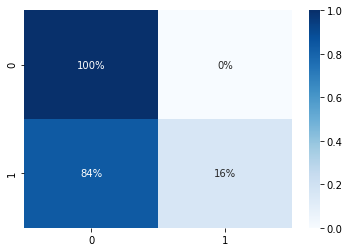

In [60]:
cm_m3 = confusion_matrix(y_val, y_pred_m3, normalize='true')
sns.heatmap(cm_m3, annot=True, cmap='Blues',fmt='.0%');

In [61]:
overall_accuracy.append(accuracy_score(y_val, y_pred_m3))
late_return_accuracy.append(recall_score(y_val, y_pred_m3))
auc_score.append(roc_auc_score(y_val, y_pred_m3))

## MODEL 4: Gradient-Boosted Decision Tree

In [62]:
import lightgbm as lgb
models.update({'m4':'lgb_gbdt'})

### training

In [63]:
m4_lgb = lgb.LGBMClassifier()
m4_lgb.fit(X_train, y_train)

LGBMClassifier()

## evaluation

In [64]:
y_pred_m4 = m4_lgb.predict(X_val)

#### accuracy

In [65]:
print(f"Accuracy of the Random Forest model is {round(m2_rf.score(X_val, y_val), 4)*100}%")

Accuracy of the Random Forest model is 94.51%


#### classification report

In [66]:
print(classification_report(y_val, y_pred_m4))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       236
         1.0       0.85      0.78      0.82        37

    accuracy                           0.95       273
   macro avg       0.91      0.88      0.89       273
weighted avg       0.95      0.95      0.95       273



#### confusion matrix

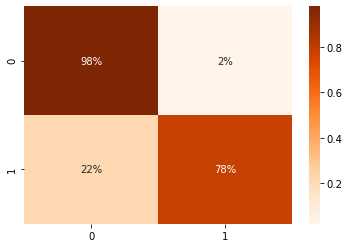

In [67]:
cm_m4 = confusion_matrix(y_val, y_pred_m4, normalize='true')
sns.heatmap(cm_m4, annot=True, cmap='Oranges',fmt='.0%');

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

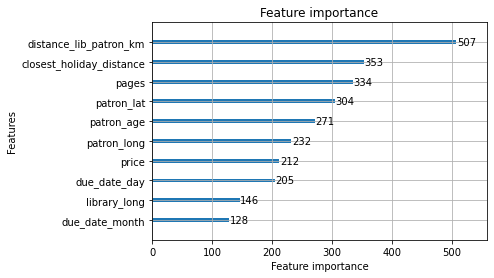

In [68]:
lgb.plot_importance(m4_lgb, max_num_features=10)

In [69]:
overall_accuracy.append(accuracy_score(y_val, y_pred_m4))
late_return_accuracy.append(recall_score(y_val, y_pred_m4))
auc_score.append(roc_auc_score(y_val, y_pred_m4))

## MODEL 5: RANDOM FOREST w/ OPTUNA HYPERPARAMETER OPTIMIZATION

In [70]:
import optuna
optuna.logging.set_verbosity(optuna.logging.FATAL)
models.update({'m5':'rf_w_optuna'})

In [71]:
def objective(trial): 
    classifier_name = 'RandomForest'
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 10, 500)
    rf_max_depth = trial.suggest_int('rf_max_depth', 1, 25)
    model = RandomForestClassifier(max_depth=rf_max_depth, n_estimators= rf_n_estimators)
    model.fit(X_train, y_train)
    score = recall_score(y_val, model.predict(X_val))
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100);

In [72]:
study.best_trial

FrozenTrial(number=19, values=[0.7027027027027027], datetime_start=datetime.datetime(2022, 8, 8, 20, 29, 25, 719918), datetime_complete=datetime.datetime(2022, 8, 8, 20, 29, 25, 774914), params={'rf_n_estimators': 27, 'rf_max_depth': 22}, distributions={'rf_n_estimators': IntUniformDistribution(high=500, low=10, step=1), 'rf_max_depth': IntUniformDistribution(high=25, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=19, state=TrialState.COMPLETE, value=None)

In [73]:
print(study.best_params)

{'rf_n_estimators': 27, 'rf_max_depth': 22}


### training

In [74]:
m5_rf= RandomForestClassifier(max_depth=study.best_params['rf_max_depth'], n_estimators=study.best_params['rf_n_estimators'], random_state=7)
m5_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=22, n_estimators=27, random_state=7)


### evaluation

In [75]:
y_pred_m5 = m5_rf.predict(X_val)

#### accuracy

In [76]:
print(f"Accuracy of the Random Forest model is {round(m5_rf.score(X_val, y_val), 4)*100}%")

Accuracy of the Random Forest model is 94.87%


#### classification report

In [77]:
print(classification_report(y_val, y_pred_m5))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       236
         1.0       0.96      0.65      0.77        37

    accuracy                           0.95       273
   macro avg       0.95      0.82      0.87       273
weighted avg       0.95      0.95      0.94       273



#### confusion matrix 

<AxesSubplot:>

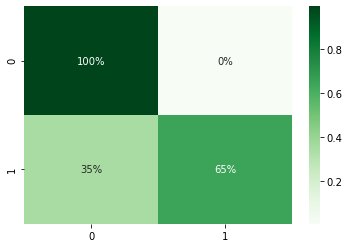

In [78]:
cm_m5 = confusion_matrix(y_val, y_pred_m5, normalize='true')
sns.heatmap(cm_m5, annot=True, fmt='.0%', cmap='Greens')

<AxesSubplot:title={'center':'Top 10 Features'}>

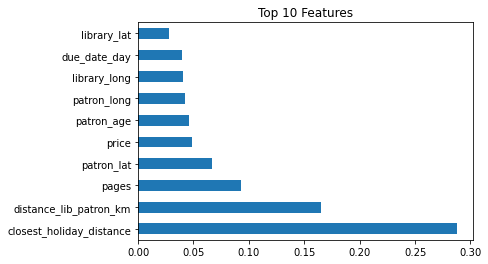

In [79]:
fi_df= pd.Series(m5_rf.feature_importances_, index=X.columns)
fi_df.sort_values(ascending=False, inplace=True)
fi_df.head(10).plot(kind='barh', title='Top 10 Features')

In [80]:
overall_accuracy.append(accuracy_score(y_val, y_pred_m5))
late_return_accuracy.append(recall_score(y_val, y_pred_m5))
auc_score.append(roc_auc_score(y_val, y_pred_m5))

## MODEL 6: GBDT with HYPERPARAMETER OPTIMIZATION

In [81]:
models.update({'m6':'gbdt_w_optuna'})

In [82]:
def objective(trial): 
    params = {'task': 'train',
    'boosting_type': 'rf',
    'objective': 'binary',
    'learning_rate':trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True),
    'num_leaves': trial.suggest_int('num_leaves', 2, 256),
    'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
    'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
    'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
    'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)}
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)],eval_metric=['recall_score'])
    y_pred = model.predict(X_val)
    accuracy = recall_score(y_val, y_pred)
    return accuracy


study = optuna.create_study(direction='maximize');
study.optimize(objective, n_trials=100);
print('Best trial:', study.best_trial.params)
print(study.best_params)

[LightGBM] [Warning] bagging_fraction is set=0.5884288108059946, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5884288108059946
[LightGBM] [Warning] feature_fraction is set=0.6873961309147638, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6873961309147638
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's binary_logloss: 0.415771
[2]	valid_0's binary_logloss: 0.412755
[3]	valid_0's binary_logloss: 0.413946
[4]	valid_0's binary_logloss: 0.414376
[5]	valid_0's binary_logloss: 0.329858
[6]	valid_0's binary_logloss: 0.337417
[7]	valid_0's binary_logloss: 0.297794
[8]	valid_0's binary_logloss: 0.304792
[9]	valid_0's binary_logloss: 0.308393
[10]	valid_0's binary_logloss: 0.29786
[11]	valid_0's binary_logloss: 0.303186
[12]	valid_0's binary_logloss: 0.296781
[13]	valid_0's binary_logloss: 0.291136
[14]	valid_0's binary_logloss: 0.295419
[15]	valid_0's binary_logloss: 0.30019
[1

[68]	valid_0's binary_logloss: 0.385068
[69]	valid_0's binary_logloss: 0.38493
[70]	valid_0's binary_logloss: 0.384847
[71]	valid_0's binary_logloss: 0.384923
[72]	valid_0's binary_logloss: 0.384866
[73]	valid_0's binary_logloss: 0.384966
[74]	valid_0's binary_logloss: 0.385198
[75]	valid_0's binary_logloss: 0.385274
[76]	valid_0's binary_logloss: 0.385143
[77]	valid_0's binary_logloss: 0.38526
[78]	valid_0's binary_logloss: 0.385394
[79]	valid_0's binary_logloss: 0.385109
[80]	valid_0's binary_logloss: 0.385163
[81]	valid_0's binary_logloss: 0.385
[82]	valid_0's binary_logloss: 0.385007
[83]	valid_0's binary_logloss: 0.385075
[84]	valid_0's binary_logloss: 0.385536
[85]	valid_0's binary_logloss: 0.385521
[86]	valid_0's binary_logloss: 0.385454
[87]	valid_0's binary_logloss: 0.385364
[88]	valid_0's binary_logloss: 0.385078
[89]	valid_0's binary_logloss: 0.384966
[90]	valid_0's binary_logloss: 0.385073
[91]	valid_0's binary_logloss: 0.385414
[92]	valid_0's binary_logloss: 0.38572
[93]	v

[90]	valid_0's binary_logloss: 0.192118
[91]	valid_0's binary_logloss: 0.192728
[92]	valid_0's binary_logloss: 0.19313
[93]	valid_0's binary_logloss: 0.193383
[94]	valid_0's binary_logloss: 0.192435
[95]	valid_0's binary_logloss: 0.192972
[96]	valid_0's binary_logloss: 0.193368
[97]	valid_0's binary_logloss: 0.194009
[98]	valid_0's binary_logloss: 0.194704
[99]	valid_0's binary_logloss: 0.194483
[100]	valid_0's binary_logloss: 0.195029
[LightGBM] [Warning] bagging_fraction is set=0.8657103674193027, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8657103674193027
[LightGBM] [Warning] feature_fraction is set=0.8666833327029202, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8666833327029202
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[1]	valid_0's binary_logloss: 0.416054
[2]	valid_0's binary_logloss: 0.416054
[3]	valid_0's binary_logloss: 0.40369
[4]	valid_0's binary_logloss: 0.397

[LightGBM] [Warning] bagging_fraction is set=0.5955645583840293, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5955645583840293
[LightGBM] [Warning] feature_fraction is set=0.5951988145839694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5951988145839694
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[1]	valid_0's binary_logloss: 0.185467
[2]	valid_0's binary_logloss: 0.204638
[3]	valid_0's binary_logloss: 0.201382
[4]	valid_0's binary_logloss: 0.18359
[5]	valid_0's binary_logloss: 0.183421
[6]	valid_0's binary_logloss: 0.194201
[7]	valid_0's binary_logloss: 0.194121
[8]	valid_0's binary_logloss: 0.193472
[9]	valid_0's binary_logloss: 0.186489
[10]	valid_0's binary_logloss: 0.183712
[11]	valid_0's binary_logloss: 0.182284
[12]	valid_0's binary_logloss: 0.174273
[13]	valid_0's binary_logloss: 0.176851
[14]	valid_0's binary_logloss: 0.171919
[15]	valid_0's binary_logloss: 0.172479
[

[94]	valid_0's binary_logloss: 0.169973
[95]	valid_0's binary_logloss: 0.170779
[96]	valid_0's binary_logloss: 0.170925
[97]	valid_0's binary_logloss: 0.17122
[98]	valid_0's binary_logloss: 0.171569
[99]	valid_0's binary_logloss: 0.171393
[100]	valid_0's binary_logloss: 0.171572
[LightGBM] [Warning] bagging_fraction is set=0.6052403036286194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6052403036286194
[LightGBM] [Warning] feature_fraction is set=0.8035669815281155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8035669815281155
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[1]	valid_0's binary_logloss: 0.185789
[2]	valid_0's binary_logloss: 0.185789
[3]	valid_0's binary_logloss: 0.179916
[4]	valid_0's binary_logloss: 0.179189
[5]	valid_0's binary_logloss: 0.179456
[6]	valid_0's binary_logloss: 0.177152
[7]	valid_0's binary_logloss: 0.179199
[8]	valid_0's binary_logloss: 0.183331

[LightGBM] [Warning] bagging_fraction is set=0.6650419870691968, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6650419870691968
[LightGBM] [Warning] feature_fraction is set=0.7900079312520737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7900079312520737
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[1]	valid_0's binary_logloss: 0.237791
[2]	valid_0's binary_logloss: 0.237791
[3]	valid_0's binary_logloss: 0.239141
[4]	valid_0's binary_logloss: 0.236587
[5]	valid_0's binary_logloss: 0.220046
[6]	valid_0's binary_logloss: 0.215065
[7]	valid_0's binary_logloss: 0.211292
[8]	valid_0's binary_logloss: 0.209963
[9]	valid_0's binary_logloss: 0.211364
[10]	valid_0's binary_logloss: 0.207075
[11]	valid_0's binary_logloss: 0.207021
[12]	valid_0's binary_logloss: 0.20627
[13]	valid_0's binary_logloss: 0.206569
[14]	valid_0's binary_logloss: 0.207087
[15]	valid_0's binary_logloss: 0.209036
[

[93]	valid_0's binary_logloss: 0.284653
[94]	valid_0's binary_logloss: 0.284505
[95]	valid_0's binary_logloss: 0.285051
[96]	valid_0's binary_logloss: 0.283256
[97]	valid_0's binary_logloss: 0.283804
[98]	valid_0's binary_logloss: 0.28429
[99]	valid_0's binary_logloss: 0.284829
[100]	valid_0's binary_logloss: 0.284138
[LightGBM] [Warning] bagging_fraction is set=0.48644803578407936, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48644803578407936
[LightGBM] [Warning] feature_fraction is set=0.8990031948307059, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8990031948307059
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[1]	valid_0's binary_logloss: 0.296303
[2]	valid_0's binary_logloss: 0.185665
[3]	valid_0's binary_logloss: 0.177783
[4]	valid_0's binary_logloss: 0.177313
[5]	valid_0's binary_logloss: 0.17783
[6]	valid_0's binary_logloss: 0.176529
[7]	valid_0's binary_logloss: 0.1726

[LightGBM] [Warning] bagging_fraction is set=0.48800988668280487, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48800988668280487
[LightGBM] [Warning] feature_fraction is set=0.9153820939286306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9153820939286306
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[1]	valid_0's binary_logloss: 0.421027
[2]	valid_0's binary_logloss: 0.421027
[3]	valid_0's binary_logloss: 0.421027
[4]	valid_0's binary_logloss: 0.376295
[5]	valid_0's binary_logloss: 0.298311
[6]	valid_0's binary_logloss: 0.297189
[7]	valid_0's binary_logloss: 0.278305
[8]	valid_0's binary_logloss: 0.268725
[9]	valid_0's binary_logloss: 0.263888
[10]	valid_0's binary_logloss: 0.248219
[11]	valid_0's binary_logloss: 0.251655
[12]	valid_0's binary_logloss: 0.255043
[13]	valid_0's binary_logloss: 0.26007
[14]	valid_0's binary_logloss: 0.265197
[15]	valid_0's binary_logloss: 0.270026

[76]	valid_0's binary_logloss: 0.225947
[77]	valid_0's binary_logloss: 0.22599
[78]	valid_0's binary_logloss: 0.22605
[79]	valid_0's binary_logloss: 0.22511
[80]	valid_0's binary_logloss: 0.224216
[81]	valid_0's binary_logloss: 0.224122
[82]	valid_0's binary_logloss: 0.224332
[83]	valid_0's binary_logloss: 0.224528
[84]	valid_0's binary_logloss: 0.224749
[85]	valid_0's binary_logloss: 0.224873
[86]	valid_0's binary_logloss: 0.224709
[87]	valid_0's binary_logloss: 0.224843
[88]	valid_0's binary_logloss: 0.225386
[89]	valid_0's binary_logloss: 0.225934
[90]	valid_0's binary_logloss: 0.226488
[91]	valid_0's binary_logloss: 0.227026
[92]	valid_0's binary_logloss: 0.227564
[93]	valid_0's binary_logloss: 0.228103
[94]	valid_0's binary_logloss: 0.228239
[95]	valid_0's binary_logloss: 0.228378
[96]	valid_0's binary_logloss: 0.227419
[97]	valid_0's binary_logloss: 0.227935
[98]	valid_0's binary_logloss: 0.228452
[99]	valid_0's binary_logloss: 0.228971
[100]	valid_0's binary_logloss: 0.229159
[L

[LightGBM] [Warning] bagging_fraction is set=0.6492100092576898, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6492100092576898
[LightGBM] [Warning] feature_fraction is set=0.8627540769045858, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8627540769045858
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[1]	valid_0's binary_logloss: 0.407719
[2]	valid_0's binary_logloss: 0.407719
[3]	valid_0's binary_logloss: 0.395413
[4]	valid_0's binary_logloss: 0.390198
[5]	valid_0's binary_logloss: 0.311173
[6]	valid_0's binary_logloss: 0.323379
[7]	valid_0's binary_logloss: 0.331188
[8]	valid_0's binary_logloss: 0.337347
[9]	valid_0's binary_logloss: 0.34051
[10]	valid_0's binary_logloss: 0.311613
[11]	valid_0's binary_logloss: 0.318847
[12]	valid_0's binary_logloss: 0.325197
[13]	valid_0's binary_logloss: 0.330715
[14]	valid_0's binary_logloss: 0.335546
[15]	valid_0's binary_logloss: 0.338824
[

[LightGBM] [Warning] bagging_fraction is set=0.5318663988451205, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5318663988451205
[LightGBM] [Warning] feature_fraction is set=0.8659375000210685, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8659375000210685
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's binary_logloss: 0.286215
[2]	valid_0's binary_logloss: 0.286215
[3]	valid_0's binary_logloss: 0.286215
[4]	valid_0's binary_logloss: 0.286215
[5]	valid_0's binary_logloss: 0.256686
[6]	valid_0's binary_logloss: 0.250923
[7]	valid_0's binary_logloss: 0.249349
[8]	valid_0's binary_logloss: 0.250195
[9]	valid_0's binary_logloss: 0.245138
[10]	valid_0's binary_logloss: 0.23447
[11]	valid_0's binary_logloss: 0.23289
[12]	valid_0's binary_logloss: 0.232144
[13]	valid_0's binary_logloss: 0.231408
[14]	valid_0's binary_logloss: 0.231111
[15]	valid_0's binary_logloss: 0.231079
[1

[57]	valid_0's binary_logloss: 0.22564
[58]	valid_0's binary_logloss: 0.225322
[59]	valid_0's binary_logloss: 0.224875
[60]	valid_0's binary_logloss: 0.226397
[61]	valid_0's binary_logloss: 0.227613
[62]	valid_0's binary_logloss: 0.227375
[63]	valid_0's binary_logloss: 0.227089
[64]	valid_0's binary_logloss: 0.228108
[65]	valid_0's binary_logloss: 0.226684
[66]	valid_0's binary_logloss: 0.228216
[67]	valid_0's binary_logloss: 0.226632
[68]	valid_0's binary_logloss: 0.227599
[69]	valid_0's binary_logloss: 0.227268
[70]	valid_0's binary_logloss: 0.22598
[71]	valid_0's binary_logloss: 0.225565
[72]	valid_0's binary_logloss: 0.2252
[73]	valid_0's binary_logloss: 0.226267
[74]	valid_0's binary_logloss: 0.227146
[75]	valid_0's binary_logloss: 0.228069
[76]	valid_0's binary_logloss: 0.227923
[77]	valid_0's binary_logloss: 0.227893
[78]	valid_0's binary_logloss: 0.228012
[79]	valid_0's binary_logloss: 0.227931
[80]	valid_0's binary_logloss: 0.227727
[81]	valid_0's binary_logloss: 0.228872
[82]

[1]	valid_0's binary_logloss: 0.428296
[2]	valid_0's binary_logloss: 0.428296
[3]	valid_0's binary_logloss: 0.428296
[4]	valid_0's binary_logloss: 0.412151
[5]	valid_0's binary_logloss: 0.362243
[6]	valid_0's binary_logloss: 0.357636
[7]	valid_0's binary_logloss: 0.309697
[8]	valid_0's binary_logloss: 0.320532
[9]	valid_0's binary_logloss: 0.327151
[10]	valid_0's binary_logloss: 0.315828
[11]	valid_0's binary_logloss: 0.3201
[12]	valid_0's binary_logloss: 0.325344
[13]	valid_0's binary_logloss: 0.316633
[14]	valid_0's binary_logloss: 0.320399
[15]	valid_0's binary_logloss: 0.323851
[16]	valid_0's binary_logloss: 0.325465
[17]	valid_0's binary_logloss: 0.329023
[18]	valid_0's binary_logloss: 0.330349
[19]	valid_0's binary_logloss: 0.333542
[20]	valid_0's binary_logloss: 0.327364
[21]	valid_0's binary_logloss: 0.330189
[22]	valid_0's binary_logloss: 0.332858
[23]	valid_0's binary_logloss: 0.335265
[24]	valid_0's binary_logloss: 0.32891
[25]	valid_0's binary_logloss: 0.331396
[26]	valid_0

[LightGBM] [Warning] bagging_fraction is set=0.8580173624743579, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8580173624743579
[LightGBM] [Warning] feature_fraction is set=0.6572197220811214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6572197220811214
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[1]	valid_0's binary_logloss: 0.182163
[2]	valid_0's binary_logloss: 0.185266
[3]	valid_0's binary_logloss: 0.19336
[4]	valid_0's binary_logloss: 0.182409
[5]	valid_0's binary_logloss: 0.18259
[6]	valid_0's binary_logloss: 0.176967
[7]	valid_0's binary_logloss: 0.172784
[8]	valid_0's binary_logloss: 0.172579
[9]	valid_0's binary_logloss: 0.168702
[10]	valid_0's binary_logloss: 0.174597
[11]	valid_0's binary_logloss: 0.172083
[12]	valid_0's binary_logloss: 0.172221
[13]	valid_0's binary_logloss: 0.175659
[14]	valid_0's binary_logloss: 0.173385
[15]	valid_0's binary_logloss: 0.174215
[1

[28]	valid_0's binary_logloss: 0.25019
[29]	valid_0's binary_logloss: 0.250334
[30]	valid_0's binary_logloss: 0.250593
[31]	valid_0's binary_logloss: 0.251518
[32]	valid_0's binary_logloss: 0.252518
[33]	valid_0's binary_logloss: 0.253578
[34]	valid_0's binary_logloss: 0.253323
[35]	valid_0's binary_logloss: 0.252537
[36]	valid_0's binary_logloss: 0.252511
[37]	valid_0's binary_logloss: 0.252956
[38]	valid_0's binary_logloss: 0.254486
[39]	valid_0's binary_logloss: 0.256013
[40]	valid_0's binary_logloss: 0.255353
[41]	valid_0's binary_logloss: 0.254799
[42]	valid_0's binary_logloss: 0.254338
[43]	valid_0's binary_logloss: 0.254671
[44]	valid_0's binary_logloss: 0.255662
[45]	valid_0's binary_logloss: 0.256672
[46]	valid_0's binary_logloss: 0.25598
[47]	valid_0's binary_logloss: 0.255375
[48]	valid_0's binary_logloss: 0.254847
[49]	valid_0's binary_logloss: 0.254742
[50]	valid_0's binary_logloss: 0.254682
[51]	valid_0's binary_logloss: 0.254663
[52]	valid_0's binary_logloss: 0.254901
[5

[83]	valid_0's binary_logloss: 0.327197
[84]	valid_0's binary_logloss: 0.328149
[85]	valid_0's binary_logloss: 0.32897
[86]	valid_0's binary_logloss: 0.329715
[87]	valid_0's binary_logloss: 0.330548
[88]	valid_0's binary_logloss: 0.331367
[89]	valid_0's binary_logloss: 0.332172
[90]	valid_0's binary_logloss: 0.332964
[91]	valid_0's binary_logloss: 0.333271
[92]	valid_0's binary_logloss: 0.333573
[93]	valid_0's binary_logloss: 0.33387
[94]	valid_0's binary_logloss: 0.334162
[95]	valid_0's binary_logloss: 0.33445
[96]	valid_0's binary_logloss: 0.331644
[97]	valid_0's binary_logloss: 0.332141
[98]	valid_0's binary_logloss: 0.332675
[99]	valid_0's binary_logloss: 0.333155
[100]	valid_0's binary_logloss: 0.333608
[LightGBM] [Warning] bagging_fraction is set=0.7435721963742878, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7435721963742878
[LightGBM] [Warning] feature_fraction is set=0.5149502504048289, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=

[LightGBM] [Warning] bagging_fraction is set=0.6166885633551061, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6166885633551061
[LightGBM] [Warning] feature_fraction is set=0.9506523564773135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9506523564773135
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[1]	valid_0's binary_logloss: 0.424714
[2]	valid_0's binary_logloss: 0.424714
[3]	valid_0's binary_logloss: 0.424714
[4]	valid_0's binary_logloss: 0.416767
[5]	valid_0's binary_logloss: 0.372198
[6]	valid_0's binary_logloss: 0.376298
[7]	valid_0's binary_logloss: 0.378593
[8]	valid_0's binary_logloss: 0.380847
[9]	valid_0's binary_logloss: 0.382949
[10]	valid_0's binary_logloss: 0.385546
[11]	valid_0's binary_logloss: 0.388152
[12]	valid_0's binary_logloss: 0.390681
[13]	valid_0's binary_logloss: 0.392893
[14]	valid_0's binary_logloss: 0.394889
[15]	valid_0's binary_logloss: 0.396689


[100]	valid_0's binary_logloss: 0.216492
[LightGBM] [Warning] bagging_fraction is set=0.6971109056649392, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6971109056649392
[LightGBM] [Warning] feature_fraction is set=0.9487868006650384, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9487868006650384
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's binary_logloss: 0.242282
[2]	valid_0's binary_logloss: 0.242282
[3]	valid_0's binary_logloss: 0.242282
[4]	valid_0's binary_logloss: 0.242282
[5]	valid_0's binary_logloss: 0.229893
[6]	valid_0's binary_logloss: 0.227401
[7]	valid_0's binary_logloss: 0.226362
[8]	valid_0's binary_logloss: 0.226207
[9]	valid_0's binary_logloss: 0.228172
[10]	valid_0's binary_logloss: 0.22991
[11]	valid_0's binary_logloss: 0.231434
[12]	valid_0's binary_logloss: 0.23277
[13]	valid_0's binary_logloss: 0.231186
[14]	valid_0's binary_logloss: 0.23021
[1

[LightGBM] [Warning] bagging_fraction is set=0.8047486586091754, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8047486586091754
[LightGBM] [Warning] feature_fraction is set=0.9227187463094839, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9227187463094839
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[1]	valid_0's binary_logloss: 0.335206
[2]	valid_0's binary_logloss: 0.335206
[3]	valid_0's binary_logloss: 0.335206
[4]	valid_0's binary_logloss: 0.290981
[5]	valid_0's binary_logloss: 0.254344
[6]	valid_0's binary_logloss: 0.24853
[7]	valid_0's binary_logloss: 0.246531
[8]	valid_0's binary_logloss: 0.247124
[9]	valid_0's binary_logloss: 0.248325
[10]	valid_0's binary_logloss: 0.235974
[11]	valid_0's binary_logloss: 0.237086
[12]	valid_0's binary_logloss: 0.238369
[13]	valid_0's binary_logloss: 0.239227
[14]	valid_0's binary_logloss: 0.240066
[15]	valid_0's binary_logloss: 0.240896
[

[68]	valid_0's binary_logloss: 0.256054
[69]	valid_0's binary_logloss: 0.255721
[70]	valid_0's binary_logloss: 0.255785
[71]	valid_0's binary_logloss: 0.255755
[72]	valid_0's binary_logloss: 0.256006
[73]	valid_0's binary_logloss: 0.256235
[74]	valid_0's binary_logloss: 0.256092
[75]	valid_0's binary_logloss: 0.255927
[76]	valid_0's binary_logloss: 0.255975
[77]	valid_0's binary_logloss: 0.256034
[78]	valid_0's binary_logloss: 0.25621
[79]	valid_0's binary_logloss: 0.255926
[80]	valid_0's binary_logloss: 0.256018
[81]	valid_0's binary_logloss: 0.255902
[82]	valid_0's binary_logloss: 0.255764
[83]	valid_0's binary_logloss: 0.255732
[84]	valid_0's binary_logloss: 0.255609
[85]	valid_0's binary_logloss: 0.255449
[86]	valid_0's binary_logloss: 0.255174
[87]	valid_0's binary_logloss: 0.255263
[88]	valid_0's binary_logloss: 0.255156
[89]	valid_0's binary_logloss: 0.255265
[90]	valid_0's binary_logloss: 0.255561
[91]	valid_0's binary_logloss: 0.255894
[92]	valid_0's binary_logloss: 0.255991
[

[99]	valid_0's binary_logloss: 0.187872
[100]	valid_0's binary_logloss: 0.187524
[LightGBM] [Warning] bagging_fraction is set=0.6190445626151643, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6190445626151643
[LightGBM] [Warning] feature_fraction is set=0.9049813813240566, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9049813813240566
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's binary_logloss: 0.280042
[2]	valid_0's binary_logloss: 0.280042
[3]	valid_0's binary_logloss: 0.280042
[4]	valid_0's binary_logloss: 0.280042
[5]	valid_0's binary_logloss: 0.251798
[6]	valid_0's binary_logloss: 0.244646
[7]	valid_0's binary_logloss: 0.242668
[8]	valid_0's binary_logloss: 0.243872
[9]	valid_0's binary_logloss: 0.239174
[10]	valid_0's binary_logloss: 0.229533
[11]	valid_0's binary_logloss: 0.228482
[12]	valid_0's binary_logloss: 0.228266
[13]	valid_0's binary_logloss: 0.228466

[9]	valid_0's binary_logloss: 0.270757
[10]	valid_0's binary_logloss: 0.270176
[11]	valid_0's binary_logloss: 0.270052
[12]	valid_0's binary_logloss: 0.270037
[13]	valid_0's binary_logloss: 0.270088
[14]	valid_0's binary_logloss: 0.270178
[15]	valid_0's binary_logloss: 0.270289
[16]	valid_0's binary_logloss: 0.269434
[17]	valid_0's binary_logloss: 0.268799
[18]	valid_0's binary_logloss: 0.268339
[19]	valid_0's binary_logloss: 0.268021
[20]	valid_0's binary_logloss: 0.267818
[21]	valid_0's binary_logloss: 0.267466
[22]	valid_0's binary_logloss: 0.267167
[23]	valid_0's binary_logloss: 0.266911
[24]	valid_0's binary_logloss: 0.266692
[25]	valid_0's binary_logloss: 0.266502
[26]	valid_0's binary_logloss: 0.264542
[27]	valid_0's binary_logloss: 0.262844
[28]	valid_0's binary_logloss: 0.261378
[29]	valid_0's binary_logloss: 0.260121
[30]	valid_0's binary_logloss: 0.259049
[31]	valid_0's binary_logloss: 0.257853
[32]	valid_0's binary_logloss: 0.256778
[33]	valid_0's binary_logloss: 0.255815
[

[58]	valid_0's binary_logloss: 0.175054
[59]	valid_0's binary_logloss: 0.174759
[60]	valid_0's binary_logloss: 0.174483
[61]	valid_0's binary_logloss: 0.174258
[62]	valid_0's binary_logloss: 0.174048
[63]	valid_0's binary_logloss: 0.173853
[64]	valid_0's binary_logloss: 0.173672
[65]	valid_0's binary_logloss: 0.174092
[66]	valid_0's binary_logloss: 0.174172
[67]	valid_0's binary_logloss: 0.174256
[68]	valid_0's binary_logloss: 0.174341
[69]	valid_0's binary_logloss: 0.174426
[70]	valid_0's binary_logloss: 0.174513
[71]	valid_0's binary_logloss: 0.174506
[72]	valid_0's binary_logloss: 0.174505
[73]	valid_0's binary_logloss: 0.173537
[74]	valid_0's binary_logloss: 0.173552
[75]	valid_0's binary_logloss: 0.173573
[76]	valid_0's binary_logloss: 0.173725
[77]	valid_0's binary_logloss: 0.173889
[78]	valid_0's binary_logloss: 0.174043
[79]	valid_0's binary_logloss: 0.174197
[80]	valid_0's binary_logloss: 0.174351
[81]	valid_0's binary_logloss: 0.174279
[82]	valid_0's binary_logloss: 0.174212


[LightGBM] [Warning] bagging_fraction is set=0.5855178745288492, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5855178745288492
[LightGBM] [Warning] feature_fraction is set=0.908233617072919, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.908233617072919
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[1]	valid_0's binary_logloss: 0.280297
[2]	valid_0's binary_logloss: 0.280297
[3]	valid_0's binary_logloss: 0.280297
[4]	valid_0's binary_logloss: 0.266058
[5]	valid_0's binary_logloss: 0.238449
[6]	valid_0's binary_logloss: 0.239807
[7]	valid_0's binary_logloss: 0.2439
[8]	valid_0's binary_logloss: 0.24813
[9]	valid_0's binary_logloss: 0.252044
[10]	valid_0's binary_logloss: 0.239728
[11]	valid_0's binary_logloss: 0.240915
[12]	valid_0's binary_logloss: 0.24226
[13]	valid_0's binary_logloss: 0.243497
[14]	valid_0's binary_logloss: 0.244644
[15]	valid_0's binary_logloss: 0.2457
[16]	val

[85]	valid_0's binary_logloss: 0.223985
[86]	valid_0's binary_logloss: 0.223841
[87]	valid_0's binary_logloss: 0.224006
[88]	valid_0's binary_logloss: 0.224283
[89]	valid_0's binary_logloss: 0.224565
[90]	valid_0's binary_logloss: 0.224852
[91]	valid_0's binary_logloss: 0.225187
[92]	valid_0's binary_logloss: 0.225521
[93]	valid_0's binary_logloss: 0.225853
[94]	valid_0's binary_logloss: 0.225769
[95]	valid_0's binary_logloss: 0.225693
[96]	valid_0's binary_logloss: 0.224769
[97]	valid_0's binary_logloss: 0.225232
[98]	valid_0's binary_logloss: 0.225695
[99]	valid_0's binary_logloss: 0.226153
[100]	valid_0's binary_logloss: 0.226358
[LightGBM] [Warning] bagging_fraction is set=0.8282962020005418, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8282962020005418
[LightGBM] [Warning] feature_fraction is set=0.964271224782871, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.964271224782871
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0

[LightGBM] [Warning] bagging_fraction is set=0.919633032790094, subsample=1.0 will be ignored. Current value: bagging_fraction=0.919633032790094
[LightGBM] [Warning] feature_fraction is set=0.9768913515368851, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9768913515368851
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's binary_logloss: 0.280152
[2]	valid_0's binary_logloss: 0.253798
[3]	valid_0's binary_logloss: 0.261082
[4]	valid_0's binary_logloss: 0.252546
[5]	valid_0's binary_logloss: 0.23244
[6]	valid_0's binary_logloss: 0.232878
[7]	valid_0's binary_logloss: 0.234182
[8]	valid_0's binary_logloss: 0.236077
[9]	valid_0's binary_logloss: 0.236879
[10]	valid_0's binary_logloss: 0.237586
[11]	valid_0's binary_logloss: 0.238879
[12]	valid_0's binary_logloss: 0.240654
[13]	valid_0's binary_logloss: 0.241165
[14]	valid_0's binary_logloss: 0.242748
[15]	valid_0's binary_logloss: 0.242865
[16

[92]	valid_0's binary_logloss: 0.314028
[93]	valid_0's binary_logloss: 0.314658
[94]	valid_0's binary_logloss: 0.315287
[95]	valid_0's binary_logloss: 0.315895
[96]	valid_0's binary_logloss: 0.312436
[97]	valid_0's binary_logloss: 0.313053
[98]	valid_0's binary_logloss: 0.31366
[99]	valid_0's binary_logloss: 0.314256
[100]	valid_0's binary_logloss: 0.314842
[LightGBM] [Warning] bagging_fraction is set=0.7940893160123318, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7940893160123318
[LightGBM] [Warning] feature_fraction is set=0.9956675031378659, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9956675031378659
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[1]	valid_0's binary_logloss: 0.335057
[2]	valid_0's binary_logloss: 0.335057
[3]	valid_0's binary_logloss: 0.326545
[4]	valid_0's binary_logloss: 0.322428
[5]	valid_0's binary_logloss: 0.290634
[6]	valid_0's binary_logloss: 0.2762

[93]	valid_0's binary_logloss: 0.233466
[94]	valid_0's binary_logloss: 0.233464
[95]	valid_0's binary_logloss: 0.233471
[96]	valid_0's binary_logloss: 0.232431
[97]	valid_0's binary_logloss: 0.232639
[98]	valid_0's binary_logloss: 0.232865
[99]	valid_0's binary_logloss: 0.233094
[100]	valid_0's binary_logloss: 0.233334
[LightGBM] [Warning] bagging_fraction is set=0.5216185058667359, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5216185058667359
[LightGBM] [Warning] feature_fraction is set=0.9330145066559673, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9330145066559673
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[1]	valid_0's binary_logloss: 0.247231
[2]	valid_0's binary_logloss: 0.247231
[3]	valid_0's binary_logloss: 0.247231
[4]	valid_0's binary_logloss: 0.245456
[5]	valid_0's binary_logloss: 0.233512
[6]	valid_0's binary_logloss: 0.239527
[7]	valid_0's binary_logloss: 0.2355

[LightGBM] [Warning] bagging_fraction is set=0.7731176161525974, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7731176161525974
[LightGBM] [Warning] feature_fraction is set=0.9463807482270495, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9463807482270495
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[1]	valid_0's binary_logloss: 0.330525
[2]	valid_0's binary_logloss: 0.330525
[3]	valid_0's binary_logloss: 0.280179
[4]	valid_0's binary_logloss: 0.268264
[5]	valid_0's binary_logloss: 0.237166
[6]	valid_0's binary_logloss: 0.238233
[7]	valid_0's binary_logloss: 0.24171
[8]	valid_0's binary_logloss: 0.244854
[9]	valid_0's binary_logloss: 0.244739
[10]	valid_0's binary_logloss: 0.245066
[11]	valid_0's binary_logloss: 0.245649
[12]	valid_0's binary_logloss: 0.246927
[13]	valid_0's binary_logloss: 0.247849
[14]	valid_0's binary_logloss: 0.248978
[15]	valid_0's binary_logloss: 0.249912
[

[6]	valid_0's binary_logloss: 0.238303
[7]	valid_0's binary_logloss: 0.221998
[8]	valid_0's binary_logloss: 0.224246
[9]	valid_0's binary_logloss: 0.228899
[10]	valid_0's binary_logloss: 0.23062
[11]	valid_0's binary_logloss: 0.223059
[12]	valid_0's binary_logloss: 0.224365
[13]	valid_0's binary_logloss: 0.22545
[14]	valid_0's binary_logloss: 0.220304
[15]	valid_0's binary_logloss: 0.224428
[16]	valid_0's binary_logloss: 0.220457
[17]	valid_0's binary_logloss: 0.220584
[18]	valid_0's binary_logloss: 0.221873
[19]	valid_0's binary_logloss: 0.225679
[20]	valid_0's binary_logloss: 0.225376
[21]	valid_0's binary_logloss: 0.229181
[22]	valid_0's binary_logloss: 0.230631
[23]	valid_0's binary_logloss: 0.233077
[24]	valid_0's binary_logloss: 0.227784
[25]	valid_0's binary_logloss: 0.22531
[26]	valid_0's binary_logloss: 0.225443
[27]	valid_0's binary_logloss: 0.225829
[28]	valid_0's binary_logloss: 0.222101
[29]	valid_0's binary_logloss: 0.222986
[30]	valid_0's binary_logloss: 0.220756
[31]	va

[32]	valid_0's binary_logloss: 0.346427
[33]	valid_0's binary_logloss: 0.347854
[34]	valid_0's binary_logloss: 0.348756
[35]	valid_0's binary_logloss: 0.348792
[36]	valid_0's binary_logloss: 0.349619
[37]	valid_0's binary_logloss: 0.35037
[38]	valid_0's binary_logloss: 0.351787
[39]	valid_0's binary_logloss: 0.353143
[40]	valid_0's binary_logloss: 0.353658
[41]	valid_0's binary_logloss: 0.354169
[42]	valid_0's binary_logloss: 0.354675
[43]	valid_0's binary_logloss: 0.354882
[44]	valid_0's binary_logloss: 0.355973
[45]	valid_0's binary_logloss: 0.357022
[46]	valid_0's binary_logloss: 0.355763
[47]	valid_0's binary_logloss: 0.354595
[48]	valid_0's binary_logloss: 0.353511
[49]	valid_0's binary_logloss: 0.354383
[50]	valid_0's binary_logloss: 0.355225
[51]	valid_0's binary_logloss: 0.356037
[52]	valid_0's binary_logloss: 0.357228
[53]	valid_0's binary_logloss: 0.358381
[54]	valid_0's binary_logloss: 0.359497
[55]	valid_0's binary_logloss: 0.35962
[56]	valid_0's binary_logloss: 0.359743
[5

[79]	valid_0's binary_logloss: 0.291385
[80]	valid_0's binary_logloss: 0.288494
[81]	valid_0's binary_logloss: 0.288163
[82]	valid_0's binary_logloss: 0.287126
[83]	valid_0's binary_logloss: 0.286148
[84]	valid_0's binary_logloss: 0.285226
[85]	valid_0's binary_logloss: 0.284357
[86]	valid_0's binary_logloss: 0.285043
[87]	valid_0's binary_logloss: 0.285977
[88]	valid_0's binary_logloss: 0.286901
[89]	valid_0's binary_logloss: 0.287814
[90]	valid_0's binary_logloss: 0.288717
[91]	valid_0's binary_logloss: 0.28948
[92]	valid_0's binary_logloss: 0.290234
[93]	valid_0's binary_logloss: 0.290977
[94]	valid_0's binary_logloss: 0.291711
[95]	valid_0's binary_logloss: 0.292436
[96]	valid_0's binary_logloss: 0.290112
[97]	valid_0's binary_logloss: 0.288995
[98]	valid_0's binary_logloss: 0.287939
[99]	valid_0's binary_logloss: 0.28694
[100]	valid_0's binary_logloss: 0.285996
[LightGBM] [Warning] bagging_fraction is set=0.65872988762456, subsample=1.0 will be ignored. Current value: bagging_frac

[LightGBM] [Warning] bagging_fraction is set=0.5938968771647244, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5938968771647244
[LightGBM] [Warning] feature_fraction is set=0.6725638304224856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6725638304224856
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[1]	valid_0's binary_logloss: 0.172492
[2]	valid_0's binary_logloss: 0.183433
[3]	valid_0's binary_logloss: 0.201669
[4]	valid_0's binary_logloss: 0.204022
[5]	valid_0's binary_logloss: 0.198661
[6]	valid_0's binary_logloss: 0.193514
[7]	valid_0's binary_logloss: 0.190018
[8]	valid_0's binary_logloss: 0.18632
[9]	valid_0's binary_logloss: 0.18493
[10]	valid_0's binary_logloss: 0.188184
[11]	valid_0's binary_logloss: 0.187416
[12]	valid_0's binary_logloss: 0.190464
[13]	valid_0's binary_logloss: 0.193929
[14]	valid_0's binary_logloss: 0.191033
[15]	valid_0's binary_logloss: 0.191892
[1

[39]	valid_0's binary_logloss: 0.33342
[40]	valid_0's binary_logloss: 0.334463
[41]	valid_0's binary_logloss: 0.335476
[42]	valid_0's binary_logloss: 0.336461
[43]	valid_0's binary_logloss: 0.336253
[44]	valid_0's binary_logloss: 0.336368
[45]	valid_0's binary_logloss: 0.333867
[46]	valid_0's binary_logloss: 0.333883
[47]	valid_0's binary_logloss: 0.333907
[48]	valid_0's binary_logloss: 0.333937
[49]	valid_0's binary_logloss: 0.334335
[50]	valid_0's binary_logloss: 0.334729
[51]	valid_0's binary_logloss: 0.33511
[52]	valid_0's binary_logloss: 0.335709
[53]	valid_0's binary_logloss: 0.336307
[54]	valid_0's binary_logloss: 0.336903
[55]	valid_0's binary_logloss: 0.335226
[56]	valid_0's binary_logloss: 0.333657
[57]	valid_0's binary_logloss: 0.331527
[58]	valid_0's binary_logloss: 0.332429
[59]	valid_0's binary_logloss: 0.333329
[60]	valid_0's binary_logloss: 0.334227
[61]	valid_0's binary_logloss: 0.335002
[62]	valid_0's binary_logloss: 0.33363
[63]	valid_0's binary_logloss: 0.334385
[64

[51]	valid_0's binary_logloss: 0.226219
[52]	valid_0's binary_logloss: 0.225974
[53]	valid_0's binary_logloss: 0.226192
[54]	valid_0's binary_logloss: 0.226305
[55]	valid_0's binary_logloss: 0.226725
[56]	valid_0's binary_logloss: 0.227171
[57]	valid_0's binary_logloss: 0.225747
[58]	valid_0's binary_logloss: 0.2258
[59]	valid_0's binary_logloss: 0.225879
[60]	valid_0's binary_logloss: 0.226011
[61]	valid_0's binary_logloss: 0.226845
[62]	valid_0's binary_logloss: 0.227677
[63]	valid_0's binary_logloss: 0.227822
[64]	valid_0's binary_logloss: 0.227976
[65]	valid_0's binary_logloss: 0.226763
[66]	valid_0's binary_logloss: 0.22756
[67]	valid_0's binary_logloss: 0.22774
[68]	valid_0's binary_logloss: 0.227928
[69]	valid_0's binary_logloss: 0.227718
[70]	valid_0's binary_logloss: 0.22753
[71]	valid_0's binary_logloss: 0.227714
[72]	valid_0's binary_logloss: 0.227906
[73]	valid_0's binary_logloss: 0.227601
[74]	valid_0's binary_logloss: 0.227749
[75]	valid_0's binary_logloss: 0.227907
[76]	

[LightGBM] [Warning] bagging_fraction is set=0.8255593359650611, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8255593359650611
[LightGBM] [Warning] feature_fraction is set=0.9020414603674954, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9020414603674954
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's binary_logloss: 0.288798
[2]	valid_0's binary_logloss: 0.288798
[3]	valid_0's binary_logloss: 0.288798
[4]	valid_0's binary_logloss: 0.288798
[5]	valid_0's binary_logloss: 0.252634
[6]	valid_0's binary_logloss: 0.252955
[7]	valid_0's binary_logloss: 0.253883
[8]	valid_0's binary_logloss: 0.255009
[9]	valid_0's binary_logloss: 0.256799
[10]	valid_0's binary_logloss: 0.243512
[11]	valid_0's binary_logloss: 0.246123
[12]	valid_0's binary_logloss: 0.248446
[13]	valid_0's binary_logloss: 0.246547
[14]	valid_0's binary_logloss: 0.244896
[15]	valid_0's binary_logloss: 0.243858


[14]	valid_0's binary_logloss: 0.221795
[15]	valid_0's binary_logloss: 0.222519
[16]	valid_0's binary_logloss: 0.223302
[17]	valid_0's binary_logloss: 0.224411
[18]	valid_0's binary_logloss: 0.225508
[19]	valid_0's binary_logloss: 0.226664
[20]	valid_0's binary_logloss: 0.222714
[21]	valid_0's binary_logloss: 0.223232
[22]	valid_0's binary_logloss: 0.223814
[23]	valid_0's binary_logloss: 0.222739
[24]	valid_0's binary_logloss: 0.223362
[25]	valid_0's binary_logloss: 0.223198
[26]	valid_0's binary_logloss: 0.220608
[27]	valid_0's binary_logloss: 0.220623
[28]	valid_0's binary_logloss: 0.220638
[29]	valid_0's binary_logloss: 0.221524
[30]	valid_0's binary_logloss: 0.222426
[31]	valid_0's binary_logloss: 0.220429
[32]	valid_0's binary_logloss: 0.219721
[33]	valid_0's binary_logloss: 0.219922
[34]	valid_0's binary_logloss: 0.220158
[35]	valid_0's binary_logloss: 0.219288
[36]	valid_0's binary_logloss: 0.219542
[37]	valid_0's binary_logloss: 0.219439
[38]	valid_0's binary_logloss: 0.219625


[48]	valid_0's binary_logloss: 0.242304
[49]	valid_0's binary_logloss: 0.242757
[50]	valid_0's binary_logloss: 0.243206
[51]	valid_0's binary_logloss: 0.243651
[52]	valid_0's binary_logloss: 0.244399
[53]	valid_0's binary_logloss: 0.245073
[54]	valid_0's binary_logloss: 0.245795
[55]	valid_0's binary_logloss: 0.245629
[56]	valid_0's binary_logloss: 0.245478
[57]	valid_0's binary_logloss: 0.243493
[58]	valid_0's binary_logloss: 0.243407
[59]	valid_0's binary_logloss: 0.24333
[60]	valid_0's binary_logloss: 0.24326
[61]	valid_0's binary_logloss: 0.243211
[62]	valid_0's binary_logloss: 0.243169
[63]	valid_0's binary_logloss: 0.243134
[64]	valid_0's binary_logloss: 0.243081
[65]	valid_0's binary_logloss: 0.241601
[66]	valid_0's binary_logloss: 0.241578
[67]	valid_0's binary_logloss: 0.241599
[68]	valid_0's binary_logloss: 0.241623
[69]	valid_0's binary_logloss: 0.241649
[70]	valid_0's binary_logloss: 0.241595
[71]	valid_0's binary_logloss: 0.241544
[72]	valid_0's binary_logloss: 0.241496
[7

[LightGBM] [Warning] bagging_fraction is set=0.8153267141397443, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8153267141397443
[LightGBM] [Warning] feature_fraction is set=0.9568628677737399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9568628677737399
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[1]	valid_0's binary_logloss: 0.361082
[2]	valid_0's binary_logloss: 0.361082
[3]	valid_0's binary_logloss: 0.361082
[4]	valid_0's binary_logloss: 0.361082
[5]	valid_0's binary_logloss: 0.292444
[6]	valid_0's binary_logloss: 0.302478
[7]	valid_0's binary_logloss: 0.30619
[8]	valid_0's binary_logloss: 0.309078
[9]	valid_0's binary_logloss: 0.311386
[10]	valid_0's binary_logloss: 0.313271
[11]	valid_0's binary_logloss: 0.314838
[12]	valid_0's binary_logloss: 0.316162
[13]	valid_0's binary_logloss: 0.315249
[14]	valid_0's binary_logloss: 0.314668
[15]	valid_0's binary_logloss: 0.314329
[

[76]	valid_0's binary_logloss: 0.292454
[77]	valid_0's binary_logloss: 0.293344
[78]	valid_0's binary_logloss: 0.293885
[79]	valid_0's binary_logloss: 0.290644
[80]	valid_0's binary_logloss: 0.287537
[81]	valid_0's binary_logloss: 0.288236
[82]	valid_0's binary_logloss: 0.288889
[83]	valid_0's binary_logloss: 0.28906
[84]	valid_0's binary_logloss: 0.289962
[85]	valid_0's binary_logloss: 0.290233
[86]	valid_0's binary_logloss: 0.29098
[87]	valid_0's binary_logloss: 0.291139
[88]	valid_0's binary_logloss: 0.291291
[89]	valid_0's binary_logloss: 0.291524
[90]	valid_0's binary_logloss: 0.291745
[91]	valid_0's binary_logloss: 0.292488
[92]	valid_0's binary_logloss: 0.292728
[93]	valid_0's binary_logloss: 0.293479
[94]	valid_0's binary_logloss: 0.29414
[95]	valid_0's binary_logloss: 0.294809
[96]	valid_0's binary_logloss: 0.292081
[97]	valid_0's binary_logloss: 0.292306
[98]	valid_0's binary_logloss: 0.292947
[99]	valid_0's binary_logloss: 0.293574
[100]	valid_0's binary_logloss: 0.293679
[L

### training

In [83]:
m6_lgb = lgb.LGBMClassifier(**study.best_params, boosting_type='rf')
m6_lgb.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.40715598711416895, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40715598711416895
[LightGBM] [Warning] feature_fraction is set=0.7727606126268771, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7727606126268771
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


LGBMClassifier(bagging_fraction=0.40715598711416895, bagging_freq=6,
               boosting_type='rf', feature_fraction=0.7727606126268771,
               learning_rate=0.00027825811381280047, min_child_samples=25,
               num_leaves=134)

## evaluation

In [84]:
y_pred_m6 = m6_lgb.predict(X_val)

#### accuracy

In [85]:
print(f"Accuracy of the Random Forest model is {round(m6_lgb.score(X_val, y_val), 4)*100}%")

Accuracy of the Random Forest model is 93.41000000000001%


#### classification report

In [86]:
print(classification_report(y_val, y_pred_m6))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       236
         1.0       0.72      0.84      0.77        37

    accuracy                           0.93       273
   macro avg       0.85      0.89      0.87       273
weighted avg       0.94      0.93      0.94       273



#### confusion matrix

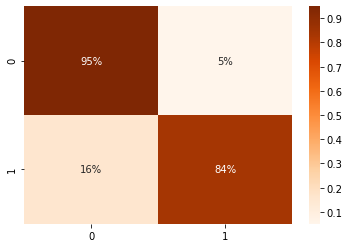

In [87]:
cm_m6 = confusion_matrix(y_val, y_pred_m6, normalize='true')
sns.heatmap(cm_m6, annot=True, cmap='Oranges',fmt='.0%');

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

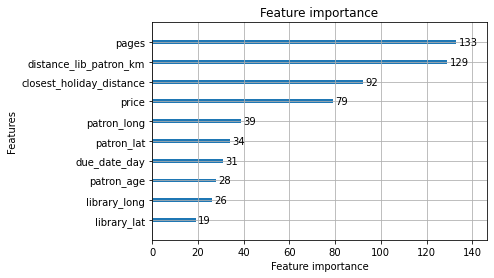

In [88]:
lgb.plot_importance(m6_lgb, max_num_features=10)

In [89]:
overall_accuracy.append(accuracy_score(y_val, y_pred_m6))
late_return_accuracy.append(recall_score(y_val, y_pred_m6))
auc_score.append(roc_auc_score(y_val, y_pred_m6))

## MODEL COMPARISON

In [90]:
model_eval_df = pd.DataFrame.from_dict(data=models,orient='index', columns=['model_name']).reset_index().rename(columns={'index':'model_id'})
model_eval_df['overall_accuracy'] = overall_accuracy
model_eval_df['late_return_accuracy'] = late_return_accuracy
model_eval_df['auc_score'] = auc_score

In [91]:
model_eval_df

,model_id,model_name,overall_accuracy,late_return_accuracy,auc_score
0,m0,majority_class_predictor,0.864469,0.000000,0.500000
1,m1,logit_reg,0.890110,0.297297,0.640174
2,m2,random_forest,0.945055,0.594595,0.797297
3,m3,naive_bayes,0.886447,0.162162,0.581081
4,m4,lgb_gbdt,0.952381,0.783784,0.881299
5,m5,rf_w_optuna,0.948718,0.648649,0.822206
6,m6,gbdt_w_optuna,0.934066,0.837838,0.893495


We are able to achieve an overall accuracy of over 95% with GBDT (without hyperparameter tuning) and RF (with optuna) models. However, the metric that might be more relevant to the library is the accuracy of late return predictions. The model that most accurately classifies late returns is MODEL 6: gradient-boosted decision tree tuned with Optuna. Thus, I'm going to go with Model 6 as the final model

## PERFORMANCE of BEST-MODEL on HOLD-OUT TEST SET

In [92]:
y_test_pred = m6_lgb.predict(X_test)

In [93]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96       107
         1.0       0.65      0.87      0.74        15

    accuracy                           0.93       122
   macro avg       0.82      0.90      0.85       122
weighted avg       0.94      0.93      0.93       122



<AxesSubplot:>

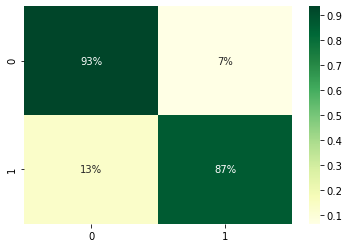

In [94]:
cm_best = confusion_matrix(y_test, y_test_pred, normalize='true')
sns.heatmap(cm_best, annot=True, fmt='.0%', cmap='YlGn')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

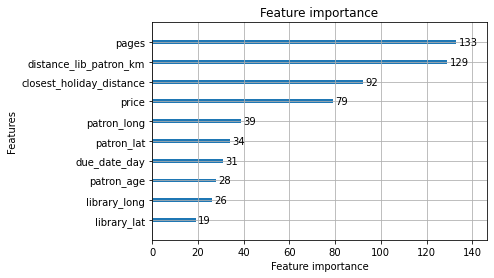

In [95]:
lgb.plot_importance(m6_lgb, max_num_features=10)

# CONCLUSION

- 6 models were trained and evaluation on training and validation datasets
- Among these 6 models, the best model was a 'Gradient Boosted Decision Tree' that was tuned using the Optuna library for automated hyperparameter optimization
- The highest accuracy for late returns achieved on the validation set was ~87%
- The overall accuracy of this model on the validation set was ~92%
- The performances on the validation set were used to decide which model to use as the final model 
- The final model is able to replicate this performance on the unseen hold-out set
- According to the final model, the most important features were: 
     - distance between the patron's home address and the library address 
     - how close the due date was to a holiday
     - price of the book
     - number of pages in the book 
     - whether or not the patron has a graduate degree
     - the day of the week the book was due